In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Spam.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.shape

(4601, 58)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

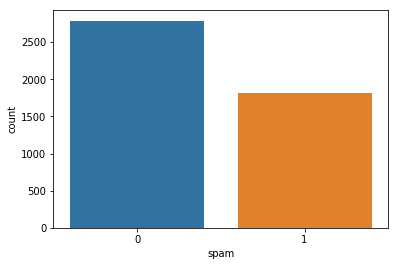

In [8]:
sns.countplot(df['spam'])
plt.show()

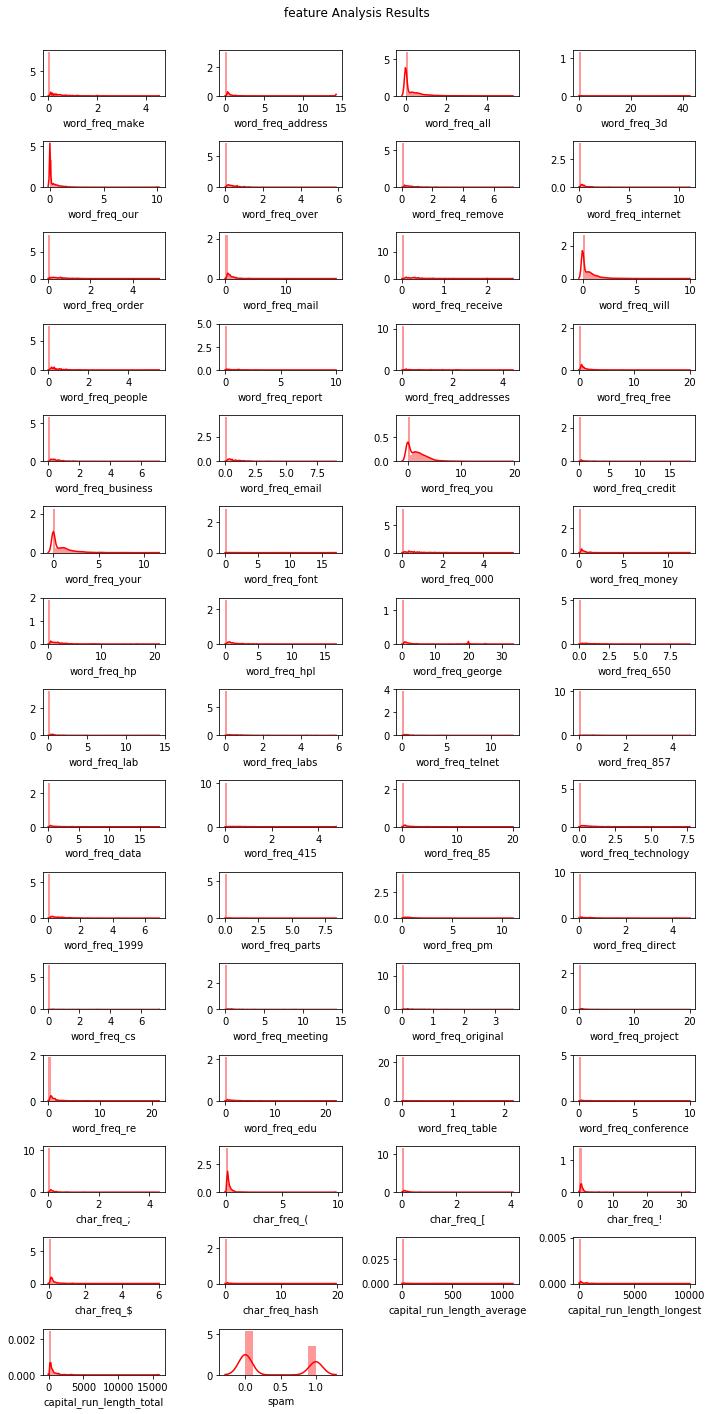

In [10]:
fig = plt.figure(figsize = (10, 20))
j = 0
for i in df:
    plt.subplot(15, 4, j+1)
    j += 1
    sns.distplot(df[i], color='r', label = 'malignant')
fig.suptitle('feature Analysis Results')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [19]:
X = df.drop('spam',axis = 1)
y = df['spam']

In [4]:
from sklearn.preprocessing import scale
X = scale(X)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(3680, 57) (921, 57) (3680,) (921,)


In [7]:
from sklearn.svm import SVC

In [8]:
clf = SVC(C = 1)
model = clf.fit(X_train,y_train)

In [9]:
y_pred = model.predict(X_test)
#y_prob = model.predict_proba(X_test)

In [10]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[546,  25],
       [ 36, 314]], dtype=int64)

In [12]:
print('accuracy',metrics.accuracy_score(y_test,y_pred))
print('precision',metrics.precision_score(y_test,y_pred))
print('recall',metrics.recall_score(y_test,y_pred))



accuracy 0.9337676438653637
precision 0.9262536873156342
recall 0.8971428571428571


## K-Fold cross validation

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [25]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)

hyper_params = [ {'gamma': [1e-2,1e-3,1e-4],
                 'C': [1,10,100,1000]}]




## GridSearchCV

In [26]:
model = SVC()
model_cv = GridSearchCV(estimator=model, param_grid=hyper_params,
                       scoring='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [27]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   48.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [28]:
y_pred_CV = model_cv.predict(X_test)


In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.386778,0.035380,0.070561,0.004879,1,0.01,"{'C': 1, 'gamma': 0.01}",0.925272,0.927989,0.907609,...,0.930435,0.016223,5,0.942935,0.941236,0.945992,0.941916,0.935122,0.941440,0.003553
1,0.493516,0.012049,0.100144,0.006936,1,0.001,"{'C': 1, 'gamma': 0.001}",0.891304,0.895380,0.891304,...,0.899457,0.008550,10,0.905571,0.902174,0.910666,0.902174,0.901495,0.904416,0.003435
2,0.865508,0.065418,0.165905,0.005618,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.813859,0.797554,0.794837,...,0.803261,0.006678,12,0.801630,0.806726,0.806386,0.805707,0.802649,0.804620,0.002076
3,0.326812,0.031306,0.051971,0.002097,10,0.01,"{'C': 10, 'gamma': 0.01}",0.929348,0.926630,0.917120,...,0.932880,0.011987,2,0.957201,0.958560,0.960938,0.958560,0.955503,0.958152,0.001790
4,0.344409,0.026947,0.059772,0.001325,10,0.001,"{'C': 10, 'gamma': 0.001}",0.922554,0.915761,0.910326,...,0.929076,0.017972,6,0.937160,0.937840,0.940897,0.935462,0.931386,0.936549,0.003124
5,0.515701,0.051589,0.095351,0.001735,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.894022,0.896739,0.884511,...,0.898913,0.009669,11,0.904552,0.900136,0.902853,0.898098,0.898098,0.900747,0.002582
6,0.385373,0.021953,0.046780,0.001935,100,0.01,"{'C': 100, 'gamma': 0.01}",0.918478,0.918478,0.923913,...,0.926630,0.010559,7,0.978940,0.978940,0.980978,0.976902,0.976223,0.978397,0.001686
7,0.310023,0.016463,0.053770,0.006075,100,0.001,"{'C': 100, 'gamma': 0.001}",0.929348,0.921196,0.918478,...,0.932880,0.012964,2,0.947011,0.947011,0.951427,0.946671,0.942595,0.946943,0.002796
8,0.348594,0.018516,0.065964,0.009092,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.923913,0.917120,0.903533,...,0.926087,0.016386,8,0.934443,0.933424,0.935122,0.929688,0.925611,0.931658,0.003559
9,0.620638,0.013721,0.043585,0.002576,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.927989,0.919837,0.921196,...,0.922826,0.005113,9,0.992188,0.991508,0.991848,0.991508,0.990489,0.991508,0.000568


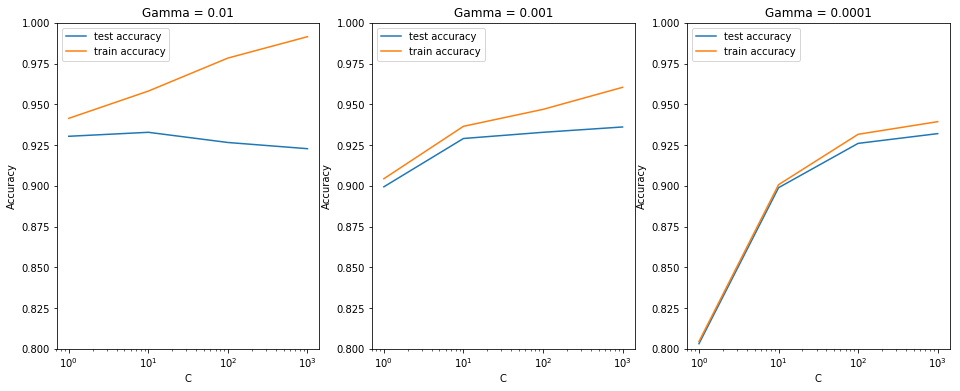

In [37]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

#sbplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.01')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.0001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

In [36]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print('The best test score is {0} corresponding to hyper parameters {1}'.format(best_score,best_hyperparams))

The best test score is 0.9361413043478262 corresponding to hyper parameters {'C': 1000, 'gamma': 0.001}
